In [5]:
%matplotlib inline 
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import classification_report
from xgboost import XGBClassifier

# Classification Fold 1

In [9]:
from sklearn.dummy import DummyClassifier
traindata=pd.read_csv("./test1.tsv",delimiter="\t")
X_test=traindata.text.values
Y_test=np.array(traindata.label.values).astype(np.int32)

traindata=pd.read_csv("./train1.tsv",delimiter="\t")
X_train=traindata.text.values
Y_train=np.array(traindata.label.values).astype(np.int32)
clf = Pipeline([('vect', CountVectorizer(ngram_range=(1,2))), ('tfidf', TfidfTransformer(use_idf=True)),
                         ('clf', SGDClassifier(loss='log', penalty='l2',alpha=0.001, max_iter=100, random_state=42,class_weight="balanced",warm_start=True))])



clf.fit(X_train,Y_train)
ypred=clf.predict(X_test)

print(classification_report(Y_test,ypred,digits=5))



              precision    recall  f1-score   support

           1    0.70000   0.36207   0.47727        58
           2    0.61268   0.96667   0.75000        90
           3    0.50000   0.08333   0.14286        12
           4    0.50000   0.20833   0.29412        24

    accuracy                        0.61957       184
   macro avg    0.57817   0.40510   0.41606       184
weighted avg    0.61816   0.61957   0.56497       184



# Classification Fold 2

In [10]:
traindata=pd.read_csv("./train2.tsv",delimiter="\t")
X_train=traindata.text.values
Y_train=np.array(traindata.label.values).astype(np.int32)

traindata=pd.read_csv("./test2.tsv",delimiter="\t")
X_test=traindata.text.values
Y_test=np.array(traindata.label.values).astype(np.int32)

clf2 = Pipeline([('vect', CountVectorizer(ngram_range=(1,2))), ('tfidf', TfidfTransformer(use_idf=True)),
                         ('clf', SGDClassifier(loss='log', penalty='l2',alpha=0.001, max_iter=100, random_state=42,class_weight="balanced",warm_start=True))])

clf2.fit(X_train,Y_train)
ypred=clf2.predict(X_test)

print(classification_report(Y_test,ypred,digits=5))


from collections import Counter
print(Counter(Y_test))
print(Counter(Y_train))


              precision    recall  f1-score   support

           1    0.58537   0.42857   0.49485        56
           2    0.59677   0.82222   0.69159        90
           3    0.00000   0.00000   0.00000        15
           4    0.31579   0.26087   0.28571        23

    accuracy                        0.56522       184
   macro avg    0.37448   0.37792   0.36804       184
weighted avg    0.50953   0.56522   0.52460       184

Counter({2: 90, 1: 56, 4: 23, 3: 15})
Counter({2: 140, 1: 71, 4: 43, 3: 22})


C:\Users\MANIKANDAN\Anaconda2\envs\dl-env\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Error Analysis

In [11]:
import eli5
from eli5.lime import TextExplainer



C:\Users\MANIKANDAN\Anaconda2\envs\dl-env\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\MANIKANDAN\Anaconda2\envs\dl-env\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)
Using TensorFlow backend.


In [17]:
import pickle
import eli5
from eli5.lime import TextExplainer
from xgboost import XGBClassifier


#BERT FEATURES FOLD 1
bertf1_xtrain=pickle.load(open('./bert_features/fold1/xtrain.pkl', 'rb'))
bertf1_xtest=pickle.load(open('./bert_features/fold1/xtest.pkl', 'rb'))

bertf1_ytrain=pickle.load(open('./bert_features/fold1/ytrain.pkl', 'rb'))
bertf1_ytest=pickle.load(open('./bert_features/fold1/ytest.pkl', 'rb'))

#BERT FEATURES FOLD 2
bertf2_xtrain=pickle.load(open('./bert_features/fold2/xtrain.pkl', 'rb'))
bertf2_xtest=pickle.load(open('./bert_features/fold2/xtest.pkl', 'rb'))

bertf2_ytrain=pickle.load(open('./bert_features/fold2/ytrain.pkl', 'rb'))
bertf2_ytest=pickle.load(open('./bert_features/fold2/ytest.pkl', 'rb'))



#ROBERT FEATURES FOLD 1
robertf1_xtrain=pickle.load(open('./robert_features/fold1/xtrain.pkl', 'rb'))
robertf1_xtest=pickle.load(open('./robert_features/fold1/xtest.pkl', 'rb'))

robertf1_ytrain=pickle.load(open('./robert_features/fold1/ytrain.pkl', 'rb'))
robertf1_ytest=pickle.load(open('./robert_features/fold1/ytest.pkl', 'rb'))

#ROBERT FEATURES FOLD 2
robertf2_xtrain=pickle.load(open('./robert_features/fold2/xtrain.pkl', 'rb'))
robertf2_xtest=pickle.load(open('./robert_features/fold2/xtest.pkl', 'rb'))

robertf2_ytrain=pickle.load(open('./robert_features/fold2/ytrain.pkl', 'rb'))
robertf2_ytest=pickle.load(open('./robert_features/fold2/ytest.pkl', 'rb'))

In [36]:
clf_SVM=SGDClassifier(loss='hinge', penalty='l2',alpha=0.001, max_iter=200, random_state=42,class_weight="balanced",warm_start=True)
clf_XGB=XGBClassifier()

In [40]:
clf_SVM.fit(bertf2_xtrain,bertf2_ytrain)
bertf2_ypred=clf_SVM.predict(bertf2_xtest)
print(classification_report(bertf2_ytest,bertf2_ypred,digits=5))

              precision    recall  f1-score   support

           0    0.66038   0.62500   0.64220        56
           1    0.75610   0.68889   0.72093        90
           2    0.33333   0.13333   0.19048        15
           3    0.30233   0.56522   0.39394        23

    accuracy                        0.60870       184
   macro avg    0.51303   0.50311   0.48689       184
weighted avg    0.63578   0.60870   0.61285       184



In [42]:
from sklearn.metrics import plot_confusion_matrix

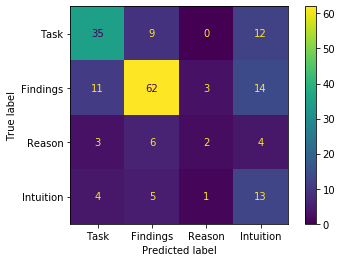

In [44]:
plot_confusion_matrix(clf_SVM,bertf2_xtest,bertf2_ytest,display_labels=["Task","Findings","Reason","Intuition"])

In [48]:
for index,(i, j) in enumerate(zip(bertf2_ytest,bertf2_ytrain)):
    if i==j:
        print(index)


1
2
4
6
8
13
14
15
21
23
25
33
37
44
46
47
49
52
53
55
57
62
64
66
70
71
76
78
79
80
84
88
96
97
100
102
103
104
106
114
115
121
125
129
133
135
136
137
138
143
145
147
149
156
157
165
167
168
170
174
175
177
179
182
